In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
data_path="E:\\5 Code\\2025_cu_qmim\\data"

In [13]:
metric_data=os.path.join(data_path,'price_metrics.parquet')
std_data=os.path.join(data_path,'factors_std.parquet')
px_all = pd.read_parquet(metric_data)
factors_std = pd.read_parquet(std_data)

px_all.head()

stock,A UN Equity,AA UN Equity,AAL UW Equity,AAON UW Equity,AAPL UW Equity,ABBV UN Equity,ABNB UW Equity,ABT UN Equity,ACGL UW Equity,ACHC UW Equity,...,YETI UN Equity,YUM UN Equity,Z UW Equity,ZBH UN Equity,ZBRA UW Equity,ZG UW Equity,ZION UW Equity,ZM UW Equity,ZS UW Equity,ZTS UN Equity
metric,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,PX_OPEN,...,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2010-11-08,22.9162,27.8420,NaN,4.3411,9.5057,NaN,NaN,17.6830,9.4614,NaN,...,NaN,28.0044,NaN,44.5356,38.18,NaN,16.3828,NaN,NaN,NaN
2010-11-09,22.9733,28.1830,NaN,4.3481,9.6272,NaN,NaN,17.5958,9.5090,NaN,...,NaN,27.4464,NaN,44.9587,37.80,NaN,16.0006,NaN,NaN,NaN
2010-11-10,22.5286,27.9824,NaN,4.3464,9.4964,NaN,NaN,17.4041,9.3822,NaN,...,NaN,27.8419,NaN,44.6306,37.50,NaN,16.4877,NaN,NaN,NaN
2010-11-11,22.0331,27.4208,NaN,4.3918,9.4472,NaN,NaN,17.3797,9.5005,NaN,...,NaN,28.1182,NaN,44.2852,37.54,NaN,16.4278,NaN,NaN,NaN
2010-11-12,22.8717,27.3405,NaN,4.3498,9.4622,NaN,NaN,17.2752,9.4889,NaN,...,NaN,27.5168,NaN,43.9916,36.96,NaN,16.0081,NaN,NaN,NaN


In [14]:
# Extract PX_LAST only (MultiIndex columns)
px = px_all.xs("PX_LAST", axis=1, level="metric")
# Resample to month end
px_m = px.resample("M").last()
px_m

C:\Users\25188\AppData\Local\Temp\ipykernel_7628\1872431937.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  px_m = px.resample("M").last()


stock,A UN Equity,AA UN Equity,AAL UW Equity,AAON UW Equity,AAPL UW Equity,ABBV UN Equity,ABNB UW Equity,ABT UN Equity,ACGL UW Equity,ACHC UW Equity,...,YETI UN Equity,YUM UN Equity,Z UW Equity,ZBH UN Equity,ZBRA UW Equity,ZG UW Equity,ZION UW Equity,ZM UW Equity,ZS UW Equity,ZTS UN Equity
2010-11-30,22.2491,26.3175,NaN,4.5141,9.3318,NaN,NaN,16.2120,9.5407,NaN,...,NaN,27.1322,NaN,42.5324,36.44,NaN,14.5766,NaN,NaN,NaN
2010-12-31,26.3215,30.8709,NaN,4.9646,9.6740,NaN,NaN,16.7000,9.3030,NaN,...,NaN,26.5741,NaN,46.3488,37.99,NaN,18.1590,NaN,NaN,NaN
2011-01-31,26.5756,33.2379,NaN,4.7394,10.1766,NaN,NaN,15.8876,9.3241,NaN,...,NaN,25.4627,NaN,51.0804,38.90,NaN,17.6718,NaN,NaN,NaN
2011-02-28,26.7345,33.8582,NaN,5.4028,10.5932,NaN,NaN,16.9219,9.5618,NaN,...,NaN,27.4067,NaN,53.8260,37.32,NaN,17.5141,NaN,NaN,NaN
2011-03-31,28.4498,35.4657,NaN,5.7900,10.4504,NaN,NaN,17.2561,10.4800,NaN,...,NaN,27.9784,NaN,52.2632,39.24,NaN,17.2891,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-31,114.5799,29.7875,11.49,83.3975,207.1339,187.6670,132.41,125.6314,86.0600,21.77,...,36.74,143.4536,79.55,91.4262,339.02,76.75,53.1720,74.05,285.56,145.2841
2025-08-31,125.4082,32.1035,13.37,82.8481,231.9153,208.8940,130.53,132.0727,91.5300,22.96,...,35.16,146.2600,84.31,105.8409,317.09,81.48,58.0100,81.42,277.05,155.8573
2025-09-30,128.3500,32.8016,11.24,93.4400,254.3835,229.8826,121.42,133.3470,90.7300,24.76,...,33.18,152.0000,77.05,98.5000,297.16,74.44,56.5800,82.50,299.66,145.8123
2025-10-31,146.3600,36.6911,13.13,98.3900,270.1083,218.0400,126.54,123.6200,86.3100,21.50,...,33.99,138.2100,74.98,100.5600,269.25,71.53,52.1100,87.23,331.14,144.0900


In [15]:
# Compute 6-1 and 12-1 momentum
mom_6_1 = np.log(px_m.shift(1)) - np.log(px_m.shift(7))

# Winsorize
def winsorize(row, lower=0.01, upper=0.99):
    if row.isna().all():
        return row
    lo, hi = row.quantile([lower, upper])
    return row.clip(lo, hi)

mom6_w = mom_6_1.apply(winsorize, axis=1)


C:\Users\25188\AppData\Local\Temp\ipykernel_7628\417161444.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pos6_d  = pos6_m.reindex(daily_ret_bt.index).ffill()


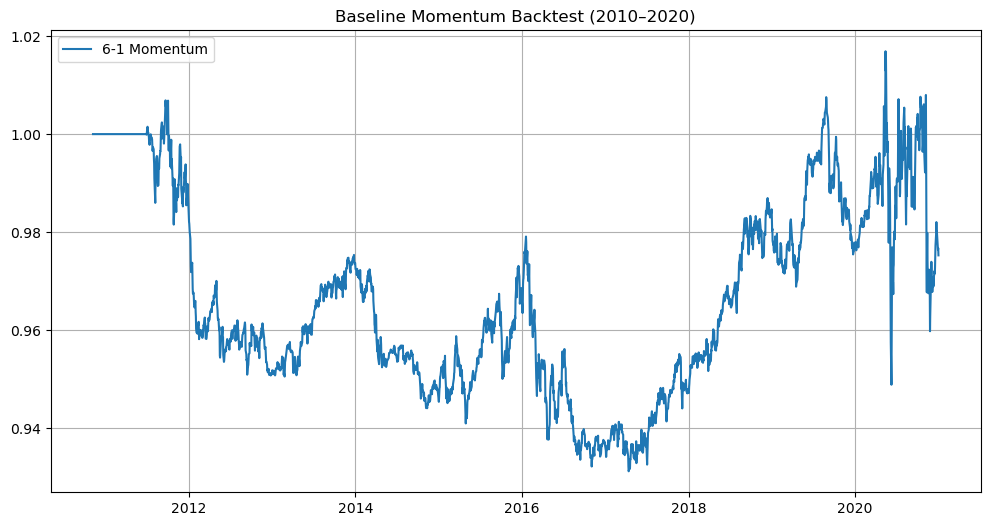

In [16]:
# Z-score
mom6_z  = mom6_w.sub(mom6_w.mean(axis=1), axis=0).div(mom6_w.std(axis=1), axis=0)


# Baseline portfolio
def build_positions(signal, long_q=0.8, short_q=0.2):
    pos = pd.DataFrame(index=signal.index, columns=signal.columns)

    for dt, row in signal.iterrows():
        r = row.rank(pct=True)
        pos.loc[dt] = (r >= long_q).astype(int) - (r <= short_q).astype(int)

    return pos

pos6_m  = build_positions(mom6_z)


# Compute daily return
daily_ret = px.pct_change()

# In-sample window
px_bt = px.loc["2010-01-01":"2020-12-31"]
daily_ret_bt = daily_ret.loc["2010-01-01":"2020-12-31"]

pos6_d  = pos6_m.reindex(daily_ret_bt.index).ffill()


# Compute strategy returns
strategy6 = (pos6_d.shift(1) * daily_ret_bt).mean(axis=1).fillna(0)


# Cum returns
cum6 = (1 + strategy6).cumprod()


# Plot


plt.figure(figsize=(12,6))
plt.plot(cum6, label="6-1 Momentum")
plt.title("Baseline Momentum Backtest (2010–2020)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
keep_metrics = [

    # VALUE
    "PE_RATIO",
    "PX_TO_BOOK_RATIO",
    "PX_TO_SALES_RATIO",
    "CURRENT_EV_TO_T12M_EBITDA",
    "FREE_CASH_FLOW_YIELD",
    "EQY_DVD_YLD_12M",

    # QUALITY
    "EBITDA_MARGIN",
    "GROSS_MARGIN",
    "OPER_MARGIN",
    "PROF_MARGIN",
    "RETURN_ON_ASSET",

    # LEVERAGE
    "TOT_DEBT_TO_EBITDA",
    "TOT_DEBT_TO_TOT_EQY",

    # SIZE
    "CURRENT_MARKET_CAP_SHARE_CLASS",

    # RISK
    "BETA_ADJ_OVERRIDABLE",
    "VOLATILITY_30D", "VOLATILITY_90D", "VOLATILITY_180D", "VOLATILITY_360D",

    # TAIL RISK
    "RET_SKEW_30D", "RET_SKEW_90D", "RET_SKEW_180D", "RET_SKEW_360D",
    "RET_KURT_30D", "RET_KURT_180D", "RET_KURT_360D", "RET_KURT_90D",

    # LIQUIDITY
    "TURNOVER","RET_30D"
]


In [18]:
factors_kmeans = factors_std.loc[:, factors_std.columns.get_level_values("metric").isin(keep_metrics)]

In [19]:
factors_kmeans = factors_kmeans.ffill()

In [20]:
print(factors_kmeans)

stock               A UN Equity                            \
metric     BETA_ADJ_OVERRIDABLE CURRENT_EV_TO_T12M_EBITDA   
2010-11-08            -0.216365                 -0.561247   
2010-11-09            -0.218998                 -0.547761   
2010-11-10            -0.219737                 -0.515250   
2010-11-11            -0.220877                 -0.543838   
2010-11-12            -0.242840                 -0.596429   
...                         ...                       ...   
2025-11-04             0.044900                  0.072625   
2025-11-05             0.043679                  0.072364   
2025-11-06             0.032101                  0.066719   
2025-11-07             0.029801                  0.069530   
2025-11-10             0.027256                  0.072761   

stock                                                                    \
metric     CURRENT_MARKET_CAP_SHARE_CLASS EBITDA_MARGIN EQY_DVD_YLD_12M   
2010-11-08                       0.599362           NaN 

In [21]:
# Collapse K-means features: median across stocks per date
X_kmeans = factors_kmeans.groupby(level="metric", axis=1).median()
# Collapse cross-section by taking median across stocks
mom6_feat  = mom6_z.median(axis=1)

X_mom = pd.DataFrame({
    "MOM_6_1": mom6_feat,
})
# Combine kmeans factors + momentum
X_all = pd.concat([X_kmeans, X_mom], axis=1)

corr_all = X_all.corr()
corr_all  # bottom rows are MOM6, MOM12 correlations


C:\Users\25188\AppData\Local\Temp\ipykernel_7628\948386862.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  X_kmeans = factors_kmeans.groupby(level="metric", axis=1).median()


,BETA_ADJ_OVERRIDABLE,CURRENT_EV_TO_T12M_EBITDA,CURRENT_MARKET_CAP_SHARE_CLASS,EBITDA_MARGIN,EQY_DVD_YLD_12M,FREE_CASH_FLOW_YIELD,GROSS_MARGIN,OPER_MARGIN,PE_RATIO,PROF_MARGIN,...,RET_SKEW_360D,RET_SKEW_90D,TOT_DEBT_TO_EBITDA,TOT_DEBT_TO_TOT_EQY,TURNOVER,VOLATILITY_180D,VOLATILITY_30D,VOLATILITY_360D,VOLATILITY_90D,MOM_6_1
BETA_ADJ_OVERRIDABLE,1.000000,-0.025434,0.394574,-0.348978,0.013998,-0.174079,0.038470,-0.151413,0.022084,-0.230383,...,-0.247655,-0.277727,0.026328,0.292064,0.220176,0.273393,0.194868,0.277753,0.209868,0.005242
CURRENT_EV_TO_T12M_EBITDA,-0.025434,1.000000,0.147785,-0.252700,0.111483,-0.340355,0.389633,-0.199448,0.114629,-0.174785,...,-0.129119,0.004302,-0.391944,-0.153267,0.322126,0.597037,0.370950,0.636670,0.563698,0.006317
CURRENT_MARKET_CAP_SHARE_CLASS,0.394574,0.147785,1.000000,-0.481917,-0.034344,0.232334,-0.014699,-0.552486,-0.532285,-0.424367,...,-0.324803,-0.257470,-0.678869,0.298910,0.657233,0.332699,0.183982,0.488891,0.234092,0.018070
EBITDA_MARGIN,-0.348978,-0.252700,-0.481917,1.000000,0.140587,-0.114815,0.001688,0.743142,0.041358,0.809070,...,0.162878,0.031464,0.341444,-0.174888,-0.512537,-0.528337,-0.345751,-0.489476,-0.471252,-0.107327
EQY_DVD_YLD_12M,0.013998,0.111483,-0.034344,0.140587,1.000000,0.015469,-0.084475,0.113381,-0.077183,0.118048,...,-0.127627,0.246863,-0.013681,0.087689,0.087835,-0.036817,-0.038116,-0.081119,-0.033959,0.378108
FREE_CASH_FLOW_YIELD,-0.174079,-0.340355,0.232334,-0.114815,0.015469,1.000000,-0.486790,-0.363356,-0.448623,-0.229667,...,-0.220427,0.055553,-0.215422,0.439285,0.142592,-0.398380,-0.390224,-0.317787,-0.387308,-0.154816
GROSS_MARGIN,0.038470,0.389633,-0.014699,0.001688,-0.084475,-0.486790,1.000000,0.091752,0.237848,0.106058,...,0.214064,0.035598,-0.044239,-0.234973,0.006357,0.411324,0.248298,0.414022,0.374625,0.045357
OPER_MARGIN,-0.151413,-0.199448,-0.552486,0.743142,0.113381,-0.363356,0.091752,1.000000,0.199673,0.890841,...,0.277906,0.134791,0.512410,-0.112895,-0.526722,-0.370407,-0.230039,-0.394488,-0.320988,0.100336
PE_RATIO,0.022084,0.114629,-0.532285,0.041358,-0.077183,-0.448623,0.237848,0.199673,1.000000,0.047247,...,0.223398,-0.065259,0.524050,-0.158143,-0.320681,0.055194,0.090495,-0.124156,0.129630,-0.096810
PROF_MARGIN,-0.230383,-0.174785,-0.424367,0.809070,0.118048,-0.229667,0.106058,0.890841,0.047247,1.000000,...,0.175594,0.135679,0.349909,-0.069197,-0.457485,-0.353946,-0.243781,-0.312843,-0.292891,0.057086


In [22]:
# Absolute correlation
abs_corr = corr_all.abs()

# Threshold
thr = 0.7

# Get upper triangle mask (avoid duplicates & self-corr=1)
mask = np.triu(np.ones(abs_corr.shape), k=1).astype(bool)

# Extract pairs
high_corr_pairs = (
    abs_corr.where(mask)
            .stack()
            .reset_index()
)

high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Apply threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= thr]

# Sort by highest correlation
high_corr_pairs = high_corr_pairs.sort_values("Correlation", ascending=False)

high_corr_pairs


,Feature1,Feature2,Correlation
183,OPER_MARGIN,PROF_MARGIN,0.890841
426,VOLATILITY_180D,VOLATILITY_360D,0.878805
427,VOLATILITY_180D,VOLATILITY_90D,0.863596
89,EBITDA_MARGIN,PROF_MARGIN,0.809070
432,VOLATILITY_360D,VOLATILITY_90D,0.768769
87,EBITDA_MARGIN,OPER_MARGIN,0.743142
430,VOLATILITY_30D,VOLATILITY_90D,0.714433
145,FREE_CASH_FLOW_YIELD,RET_KURT_360D,0.711843
317,RET_KURT_180D,RET_KURT_90D,0.710827


In [23]:


def choose_k_silhouette(X, k_min=5, k_max=20):
    best_k = k_min
    best_score = -1

    for k in range(k_min, k_max+1):
        km = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
        score = silhouette_score(X, km.labels_)
        if score > best_score:
            best_score = score
            best_k = k

    return best_k


C:\Users\25188\AppData\Local\Temp\ipykernel_7628\2424037876.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  factors_kmeans_m = factors_kmeans.resample("M").last()
e:\Code\Anaconda\envs\hwenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Code\Anaconda\envs\hwenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Code\Anaconda\envs\hwenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

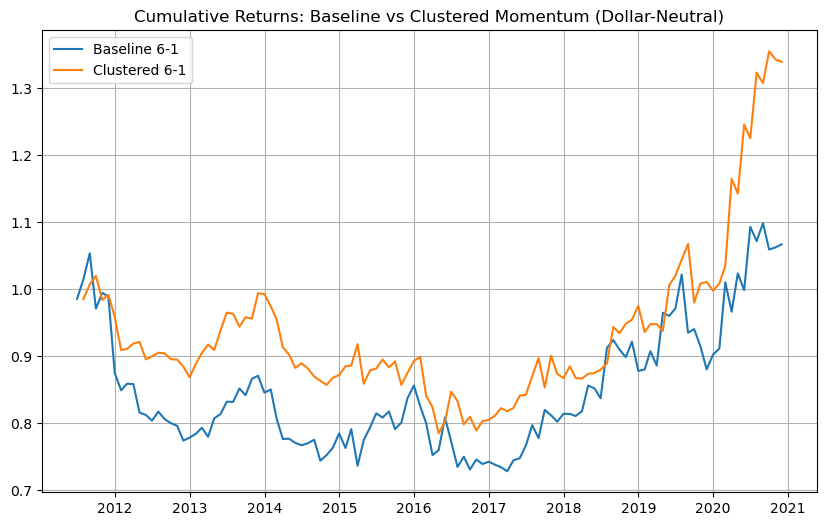

In [24]:



# Feature smoothing (EWMA)

lambda_ = 0.94
alpha = 1 - lambda_

metrics_in_data = factors_kmeans.columns.get_level_values("metric").unique()

for m in metrics_in_data:
    X = factors_kmeans.xs(m, axis=1, level="metric")
    X_smooth = X.ewm(alpha=alpha, adjust=False, min_periods=1).mean()

    X_smooth.columns = pd.MultiIndex.from_product(
        [[m], X_smooth.columns], names=["metric", "stock"]
    )

    mask = factors_kmeans.columns.get_level_values("metric") == m
    factors_kmeans.loc[:, mask] = X_smooth.values

# Monthly snapshot
factors_kmeans_m = factors_kmeans.resample("M").last()


# Momentum signal (6-1)

def winsorize_cs(row, lower=0.01, upper=0.99):
    if row.isna().all():
        return row
    lo, hi = row.quantile([lower, upper])
    return row.clip(lo, hi)

mom6_w = mom_6_1.apply(winsorize_cs, axis=1)

def zscore_cs(X):
    return X.sub(X.mean(axis=1), axis=0).div(X.std(axis=1).replace(0, np.nan), axis=0)

mom6_z = zscore_cs(mom6_w)

# Forward monthly return
fwd_ret_m = np.log(px_m.shift(-1)) - np.log(px_m)



# Long-short return function
def long_short_return(signal_cs, fwd_ret_cs, long_frac=0.2, short_frac=0.2):
    sig = signal_cs.dropna()
    common = sig.index.intersection(fwd_ret_cs.dropna().index)
    if len(common) < 10:
        return np.nan

    sig = sig.loc[common]
    r = fwd_ret_cs.loc[common]

    n = len(sig)
    n_long = max(1, int(n * long_frac))
    n_short = max(1, int(n * short_frac))

    sig_sorted = sig.sort_values()

    long_names = sig_sorted.index[-n_long:]
    short_names = sig_sorted.index[:n_short]

    return r.loc[long_names].mean() - r.loc[short_names].mean()


# Rolling K-means backtest
K = 30 # number of clusters

# Valid monthly dates
rebalance_dates = mom6_z.dropna(how="all").index
rebalance_dates = rebalance_dates.intersection(factors_kmeans_m.index)
rebalance_dates = rebalance_dates.intersection(fwd_ret_m.index)

rebalance_dates = rebalance_dates[(rebalance_dates >= "2011-01-31") &
                                  (rebalance_dates <= "2020-12-31")]

baseline_returns = []
cluster_returns = []
cluster_dates = []

# Baseline
for t in rebalance_dates[:-1]:
    baseline_returns.append(long_short_return(mom6_z.loc[t], fwd_ret_m.loc[t]))
# full-df baseline dates (no intersection with cluster dates)
baseline_dates = rebalance_dates[:-1]

# Clustered stratege

for t in rebalance_dates[:-1]:
    t_next = rebalance_dates[rebalance_dates.get_loc(t) + 1]

    # Load monthly features
    row_t = factors_kmeans_m.loc[t]
    X_t = row_t.unstack("metric")

    # Keep stocks with >=70% non-NaN features
    min_valid = int(0.7 * X_t.shape[1])
    X_t = X_t.dropna(axis=0, thresh=min_valid).fillna(0)

    if X_t.shape[0] < K + 5:
        continue

    # Fit K-means
    km = KMeans(n_clusters=K, n_init=50, random_state=0)
    labels = km.fit_predict(X_t.values)

    clusters_t = pd.Series(labels, index=X_t.index, name="cluster")

    sig6_t = mom6_z.loc[t]
    fwd_t = fwd_ret_m.loc[t]

    # Align to available universe
    universe = X_t.index.intersection(sig6_t.dropna().index).intersection(fwd_t.dropna().index)
    if len(universe) < K * 5:
        continue

    clusters_t = clusters_t.loc[universe]
    sig6_t = sig6_t.loc[universe]
    fwd_t = fwd_t.loc[universe]

    # Drop clusters with <5 names
    valid_clusters = clusters_t.value_counts()[lambda x: x >= 5].index
    clusters_t = clusters_t[clusters_t.isin(valid_clusters)]
    sig6_t = sig6_t.loc[clusters_t.index]
    fwd_t = fwd_t.loc[clusters_t.index]

    # Equal-weight long/short across clusters
    cluster_ls = []
    for cid in clusters_t.unique():
        idx = clusters_t.index[clusters_t == cid]
        if len(idx) < 10:
            continue
        ret_c = long_short_return(sig6_t.loc[idx], fwd_t.loc[idx])
        if not np.isnan(ret_c):
            cluster_ls.append(ret_c)

    if len(cluster_ls) < max(3, int(0.3 * K)):
        continue

    cluster_returns.append(np.mean(cluster_ls))
    cluster_dates.append(t_next)


# Build results dataframe

results = pd.DataFrame(index=baseline_dates)
results["Baseline_6_1"] = baseline_returns
results["Cluster_6_1"] = pd.Series(cluster_returns, index=cluster_dates)

cum = (1 + results).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cum.index, cum["Baseline_6_1"], label="Baseline 6-1")
plt.plot(cum.index, cum["Cluster_6_1"], label="Clustered 6-1")
plt.legend()
plt.title("Cumulative Returns: Baseline vs Clustered Momentum (Dollar-Neutral)")
plt.grid(True)
plt.show()
